In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias.html

In [2]:
filename = 'covid19-es-and.csv'
fecha = '03/06/2020'
id_noticia = '237282'
url = 'https://www.juntadeandalucia.es/organismos/saludyfamilias/actualidad/noticias/detalle/' + id_noticia + '.html'

In [3]:
# Load
tables = pd.read_html(url, header=0, thousands='.')
assert len(tables) > 0
dfL = tables[0]

In [4]:
# Prepare
dfL['Fecha'] = fecha
# A partir del 14/05/2020 se cambia el formato del dato añadiendo en la misma columna el número de nuevos casos
for col in ['PCR Positivo',	'Hospitalización', 'UCI', 'Fallecimientos',	'Curados']:
    dfL[col] = dfL[col].str.split(' ').str[0]

dfL

,Provincia,PCR Positivo,Hospitalización,UCI,Fallecimientos,Curados,Fecha
0,Almería,517,240,41,54,675,03/06/2020
1,Cádiz,1.274,583,81,159,1.016,03/06/2020
2,Córdoba,1.346,560,76,117,1.540,03/06/2020
3,Granada,2.455,1.204,133,286,2.827,03/06/2020
4,Huelva,405,222,30,48,467,03/06/2020
5,Jaén,1.462,769,90,182,1.478,03/06/2020
6,Málaga,2.801,1.491,168,287,2.934,03/06/2020
7,Sevilla,2.477,1.207,150,286,2.709,03/06/2020
8,Total,12.737,6.276,769,1.419,13.646,03/06/2020


In [5]:
data = pd.melt(dfL, id_vars=['Provincia', 'Fecha'])
data.sample(5)

,Provincia,Fecha,variable,value
43,Sevilla,03/06/2020,Curados,2.709
37,Cádiz,03/06/2020,Curados,1.016
14,Jaén,03/06/2020,Hospitalización,769
32,Jaén,03/06/2020,Fallecimientos,182
15,Málaga,03/06/2020,Hospitalización,1.491


In [6]:
# Save to csv
data.to_csv(filename, encoding='utf-8', header=False, mode='+a', index=False)

In [7]:
# Load full csv
dfL = pd.read_csv(filename, thousands='.', parse_dates=['Fecha'], dayfirst=True)
dfL.tail()

,Provincia,Fecha,variable,value
2290,Huelva,2020-06-03,Curados,467
2291,Jaén,2020-06-03,Curados,1478
2292,Málaga,2020-06-03,Curados,2934
2293,Sevilla,2020-06-03,Curados,2709
2294,Total,2020-06-03,Curados,13646


In [8]:
# Guardar el último día
last_fecha = dfL['Fecha'].max()

In [9]:
# Organizar en forma de tabla
df = pd.pivot_table(dfL, values='value', index=['Provincia', 'Fecha'], columns='variable')
df.sort_index(inplace=True)

In [10]:
# Variaciones con respecto al día anterior
dfV = df.groupby(level='Provincia').pct_change() * 100
dfV.tail()

Curados  Fallecimientos  Hospitalización  PCR Positivo  \
Provincia Fecha                                                                 
Total     2020-05-30  1.523970        0.212164         0.143977           NaN   
          2020-05-31  0.497850        0.141143         0.015974           NaN   
          2020-06-01  0.345268       -0.070472         0.015972           NaN   
          2020-06-02  1.174359        0.070522         0.127755      0.220594   
          2020-06-03  0.887180        0.000000         0.095694      0.125776   

                          UCI  
Provincia Fecha                
Total     2020-05-30      NaN  
          2020-05-31      NaN  
          2020-06-01      NaN  
          2020-06-02  0.00000  
          2020-06-03 -0.12987

In [11]:
# Para seleccionar todas las filas de una o varias fechas hay que usar un trick ya que : no se puede usar en este caso
dfG = dfV.loc[(slice(None), [last_fecha]), :]

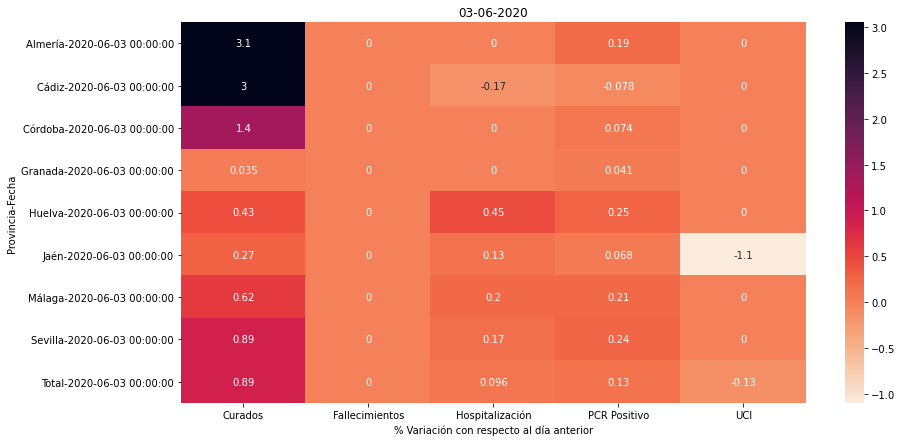

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title(last_fecha.strftime('%d-%m-%Y'))

# Invertir los colores
cmap = sns.cm.rocket_r

# Heatmap 
sns.heatmap(data=dfG, annot=True, cmap=cmap)

# Add label for horizontal axis
plt.xlabel('% Variación con respecto al día anterior')
plt.show()

In [13]:
provincia = 'Total'
dias = 15
# data = df.loc[provincia][['Hospitalización', 'Curados', 'Fallecimientos']].diff().tail(dias).copy()
data = df.loc[provincia].diff().tail(dias).copy()
titulo = 'Nuevos casos en los últimos ' + str(dias) + ' días en ' + provincia


In [14]:
print(titulo)
print(data)

Nuevos casos en los últimos 15 días en Total
variable    Curados  Fallecimientos  Hospitalización  PCR Positivo  UCI
Fecha                                                                  
2020-05-20    546.0            10.0             20.0           NaN  NaN
2020-05-21    335.0             4.0             14.0           NaN  NaN
2020-05-22    188.0             2.0              5.0           NaN  NaN
2020-05-23    269.0            12.0             14.0           NaN  NaN
2020-05-24    100.0             2.0              1.0           NaN  NaN
2020-05-25     49.0             1.0              3.0           NaN  NaN
2020-05-26    264.0            14.0             12.0           NaN  NaN
2020-05-27    196.0             5.0              0.0           NaN  NaN
2020-05-28    167.0             3.0              2.0           NaN  NaN
2020-05-29    201.0             0.0              4.0           NaN  NaN
2020-05-30    199.0             3.0              9.0           NaN  NaN
2020-05-31     66.0

Nuevos casos en los últimos 15 días en Total. (Nuevos ingresos hospitalarios)


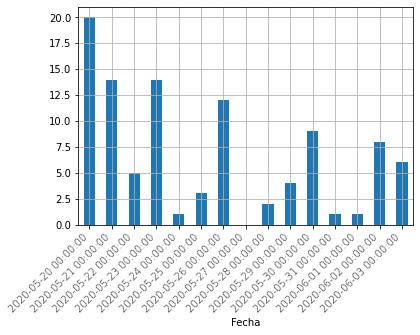

In [15]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Hospitalización'].plot(kind='bar', grid=True)
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

In [16]:
# Fecha de último ingreso en hospital
data = df[['Hospitalización']].diff()
data = data[data['Hospitalización'] > 0].sort_index(ascending=False).groupby('Provincia').head(1).copy()
data.reset_index(inplace=True)
data['dias'] = pd.to_datetime(fecha, dayfirst=True) - data['Fecha']
data.set_index('Provincia', inplace=True)
data.sort_values('dias', ascending=False)

variable,Fecha,Hospitalización,dias
Provincia,,,
Almería,2020-05-31,1.0,3 days
Cádiz,2020-06-01,1.0,2 days
Granada,2020-06-02,1.0,1 days
Córdoba,2020-06-02,1.0,1 days
Total,2020-06-03,6.0,0 days
Sevilla,2020-06-03,2.0,0 days
Málaga,2020-06-03,3.0,0 days
Jaén,2020-06-03,1.0,0 days
Huelva,2020-06-03,1.0,0 days
